In [1]:
# import library
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv("stock_india.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421802,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405576,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [5]:
df_new = df[['Adj Close', 'Date']]
df_new

,Adj Close,Date
0,2.417746,1996-01-01
1,2.413689,1996-01-02
2,2.421802,1996-01-03
3,2.405576,1996-01-04
4,2.401519,1996-01-05
...,...,...
6462,1558.849976,2021-08-24
6463,1557.400024,2021-08-25
6464,1554.800049,2021-08-26
6465,1548.449951,2021-08-27


In [6]:
df_new.dtypes

Adj Close           float64
Date         datetime64[ns]
dtype: object

In [7]:
df_new.columns = ['y', 'ds']
df_new

,y,ds
0,2.417746,1996-01-01
1,2.413689,1996-01-02
2,2.421802,1996-01-03
3,2.405576,1996-01-04
4,2.401519,1996-01-05
...,...,...
6462,1558.849976,2021-08-24
6463,1557.400024,2021-08-25
6464,1554.800049,2021-08-26
6465,1548.449951,2021-08-27


In [8]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_new)

In [9]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,2.076454,-91.236110,105.864164,2.076454,2.076454,3.714783,3.714783,3.714783,-1.35767,...,-0.201470,-0.201470,-0.201470,5.273922,5.273922,5.273922,0.0,0.0,0.0,5.791236
1,1996-01-02,2.084098,-98.958379,108.838092,2.084098,2.084098,3.897777,3.897777,3.897777,-1.35767,...,-0.133083,-0.133083,-0.133083,5.388530,5.388530,5.388530,0.0,0.0,0.0,5.981875
2,1996-01-03,2.091742,-93.479198,115.929074,2.091742,2.091742,3.545344,3.545344,3.545344,-1.35767,...,-0.592366,-0.592366,-0.592366,5.495380,5.495380,5.495380,0.0,0.0,0.0,5.637086
3,1996-01-04,2.099386,-96.338487,114.655080,2.099386,2.099386,4.562523,4.562523,4.562523,-1.35767,...,0.327959,0.327959,0.327959,5.592234,5.592234,5.592234,0.0,0.0,0.0,6.661909
4,1996-01-05,2.107029,-98.113625,111.744439,2.107029,2.107029,4.579069,4.579069,4.579069,-1.35767,...,0.259544,0.259544,0.259544,5.677195,5.677195,5.677195,0.0,0.0,0.0,6.686099


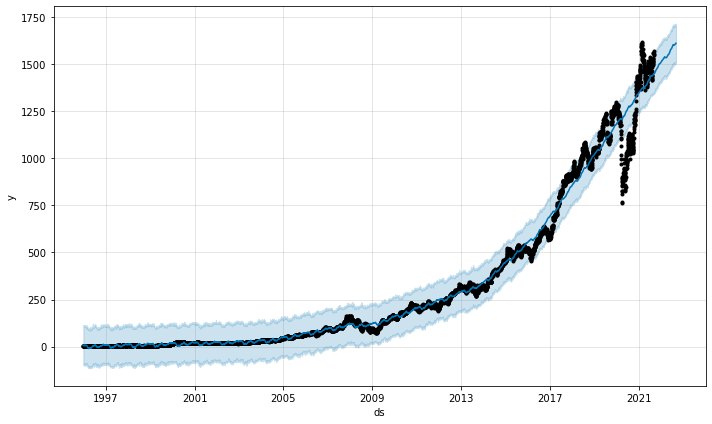

In [10]:
plot1 = m.plot(forecast)

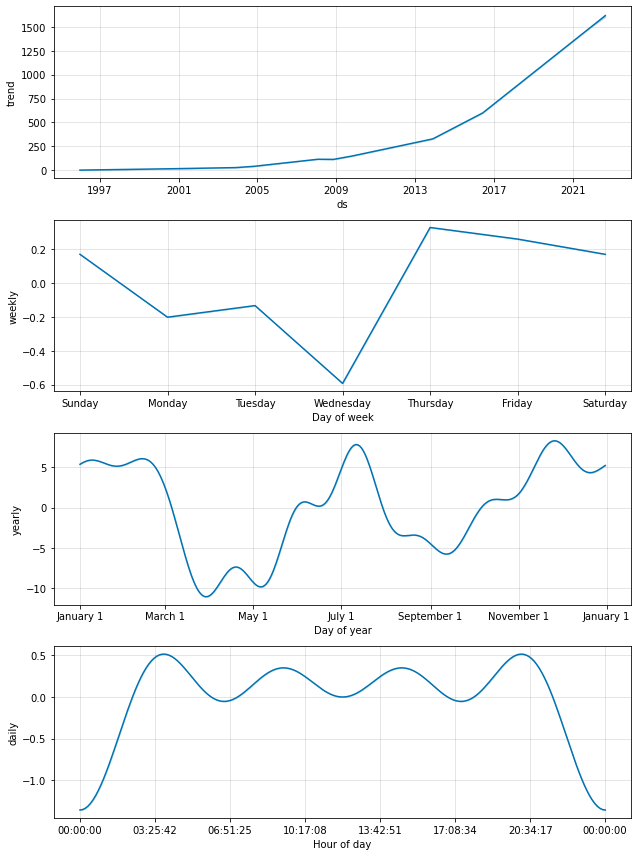

In [11]:
plt2 = m.plot_components(forecast)